## Generador de distribuciones:

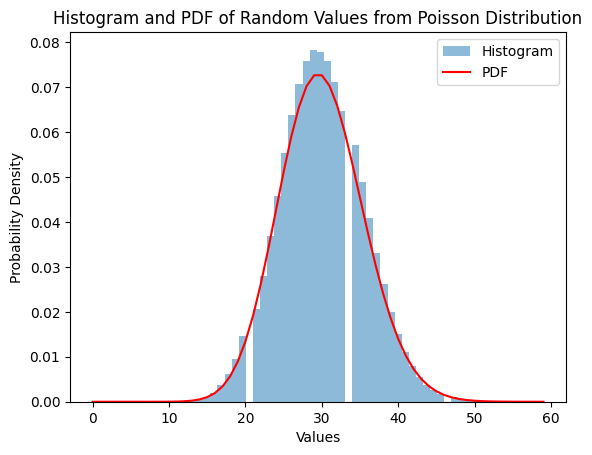

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
from scipy.stats import poisson



# Set the lambda parameter for the Poisson distribution
lambda_param = 30

# Generate random values from the Poisson distribution
random_values = np.random.poisson(lambda_param, size=2000000)

# Create a histogram of the random values
plt.hist(random_values, bins=55, density=True, alpha=0.5, label='Histogram')

# Create an array of values for x-axis
x = np.arange(0, np.max(random_values) + 1)

# Calculate the PDF values for the Poisson distribution
pdf_values = poisson.pmf(x, lambda_param)

# Plot the PDF curve
plt.plot(x, pdf_values, 'r-', label='PDF')

plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Histogram and PDF of Random Values from Poisson Distribution')
plt.legend()
plt.show()


#  Comportamiento check in new york


In [2]:
#Librerias y carga

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import powerlaw #Powerlaw: A Python Package for Analysis of Heavy-Tailed Distributions
# Initialize an empty list to store the data
data = []

# Open the text file for reading with the specified encoding
with open(r'C:\Users\oscar\OneDrive - Universidad Nacional de Colombia\Tesis\Comportamineto humano\Articulos New york profe Riascos\dataset_tsmc2014\dataset_TSMC2014_NYC.txt', 'r', encoding='latin-1') as file:
    # Read each line in the file
    for line in file:
        # Split the line into columns based on the tab delimiter
        columns = line.strip().split('\t')
        
        # Append the columns to the data list
        data.append(columns)

# Define the column names
column_names = ['User ID', 'Venue ID', 'Venue category ID', 'Venue category name', 'Latitude', 'Longitude', 'Timezone offset in minutes', 'UTC time']

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=column_names)

# Optionally, convert columns to appropriate data types
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
df['Timezone offset in minutes'] = df['Timezone offset in minutes'].astype(int)

# Display the DataFrame
df.head()


,User ID,Venue ID,Venue category ID,Venue category name,Latitude,Longitude,Timezone offset in minutes,UTC time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012


In [3]:
print('hay',df['User ID'].unique().size, 'usuarios únicos')
def get_most_entries_user(df):
    user_counts = df['User ID'].value_counts()
    most_entries_user = user_counts.idxmax()
    most_entries_count = user_counts.max()
    return most_entries_user, most_entries_count

most_entries_user, most_entries_count = get_most_entries_user(df)
print(f"The user ID with the most entries is {most_entries_user} with {most_entries_count} entries.")


hay 1083 usuarios únicos
The user ID with the most entries is 293 with 2697 entries.


## 1). Estudio Inter-Event time: User 293

In [4]:
df_filtered = df[df['User ID'] == '293'][['User ID', 'Timezone offset in minutes', 'UTC time']]
#pilas no lo esta tomando como tiempo 
df_filtered['UTC time'] = pd.to_datetime(df_filtered['UTC time'])
df_filtered = df_filtered.sort_values('UTC time')
df_filtered.head()

C:\Users\oscar\AppData\Local\Temp\ipykernel_11908\3541682032.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtered['UTC time'] = pd.to_datetime(df_filtered['UTC time'])


,User ID,Timezone offset in minutes,UTC time
690,293,-240,2012-04-03 23:56:43+00:00
760,293,-240,2012-04-04 00:19:13+00:00
763,293,-240,2012-04-04 00:19:44+00:00
766,293,-240,2012-04-04 00:21:12+00:00
1121,293,-240,2012-04-04 04:53:06+00:00


### 1.2)Eventos y $\tau$

#### Voy a asumir que todos los eventos son sucesivos y calculo el tiempo

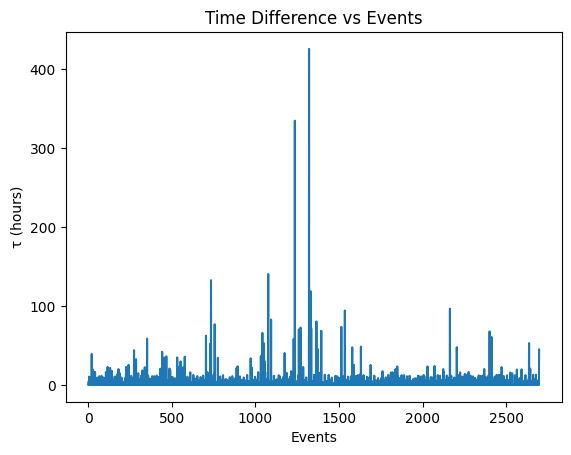

,User ID,Timezone offset in minutes,UTC time,Time Difference τ,Counter,Time Difference (hours)
690,293,-240,2012-04-03 23:56:43+00:00,NaT,0,NaN
760,293,-240,2012-04-04 00:19:13+00:00,0 days 00:22:30,1,0.375000
763,293,-240,2012-04-04 00:19:44+00:00,0 days 00:00:31,2,0.008611
766,293,-240,2012-04-04 00:21:12+00:00,0 days 00:01:28,3,0.024444
1121,293,-240,2012-04-04 04:53:06+00:00,0 days 04:31:54,4,4.531667


In [5]:
df_filtered['Time Difference τ'] = df_filtered['UTC time'].diff()
#el tiempo de diferencia es el tiempo que pasa entre cada uno de los eventos, el valor de las filas es el tiempo entre el anterior y esa fila 

# Create a counter column
df_filtered['Counter'] = range(len(df_filtered))

# Convert time difference to hours
df_filtered['Time Difference (hours)'] = df_filtered['Time Difference τ'].dt.total_seconds() / 3600

# Plot the graph
plt.plot(df_filtered['Counter'], df_filtered['Time Difference (hours)'])
plt.xlabel('Events')
plt.ylabel('τ (hours)')
plt.title('Time Difference vs Events')
plt.show()

df_filtered.head()


### 1.2)El histograma:


In [6]:
# Convert the time differences to an array
time_diff_array = np.array(df_filtered['Time Difference (hours)'])

# Remove NaN values from the array
time_diff_array = time_diff_array[~np.isnan(time_diff_array)]
time_diff_array.sort()

print(len(time_diff_array), max(time_diff_array), min(time_diff_array))
print(min(x for x in time_diff_array if x > min(time_diff_array)))

2696 425.63694444444445 0.0
0.0002777777777777778


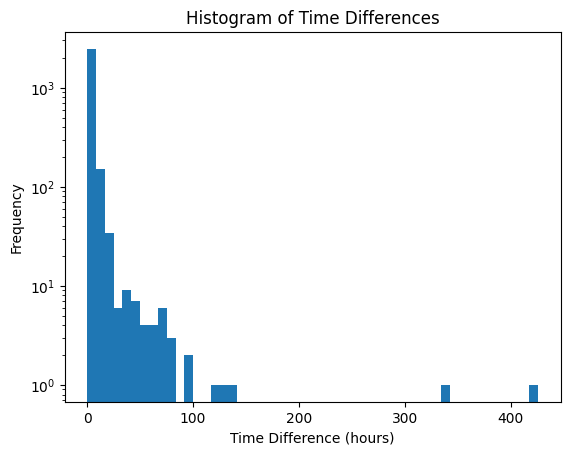

In [7]:
#EL HISTOGRAMA CON BINS NORMALES
plt.hist(time_diff_array, bins=51, log=True)#toma la frecuenecia en escala log, tenemos binds lineales
plt.xlabel('Time Difference (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Differences')
plt.show()


### 1.3)Rabdom distribucion pareto:


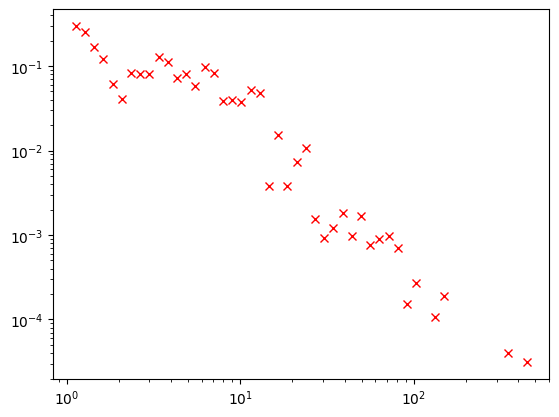

In [8]:
#vals,base=np.histogram(time_diff_array,bins=10**np.linspace(-1,3,51), density=True)
#la densidad cambia los valores del vals, el len de vals va ser igual al numero de bins que se tenga!! 
# If True, the result is the value of the probability density function at the bin, normalized such that the integral
# over the range is 1. Note that the sum of the histogram values will not be equal to 1 unless bins of unity width are 
# chosen; it is not a probability mass function.

#Calculo de la densidad de probabilidad vals
vals,base=np.histogram(time_diff_array,bins=10**np.linspace(0,2.65,51), density=True)

#Grafica de los valors de densidad de probabilidad
plt.loglog(base[1::],vals,'rx')#[1::] es por la dimension

### 1.4)Fiting power laws to empirical data:

In [9]:

def plot_power_law(time_diff_array, bins):
    fit = powerlaw.Fit(time_diff_array)
    alpha = fit.alpha
    xmin = fit.xmin
    fit.power_law.plot_pdf(color='b', linestyle='--', label='fit ccdf')
    fit.plot_pdf(color='b', linewidth=2)
    fit.plot_pdf(color='r', linestyle='None', marker='o', markersize=5, label='data points')

    vals, base = np.histogram(time_diff_array, bins=bins, density=True)
    plt.loglog(base[1::], vals, 'rx')

    plt.legend()
    plt.show()

    fit.plot_pdf(color='b', linewidth=2)
    plt.xlabel('Time Difference (hours)')
    plt.ylabel('Probability Density')
    plt.title('Probability Density Function')
    plt.show()
    print (alpha, xmin)


In [25]:
plot_power_law(time_diff_array, 12*10**np.linspace(0, 2.65, 51))

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


KeyboardInterrupt: 

Yo veo 2 opciones, 1)que de mis datos los iniciales no sigan un power law y por eso no se vea correcto, seria cortar el time dif array y tomar solo esos valores. 2) De pronto graficabdo el pdf. 3) Mirar los puntos rojos del fit

## 2)Histograma semanal usuario 293

#### Primero intentamos el histograma de la semana para una persona

In [11]:
user_293 = df[df['User ID'] == '293'][['User ID', 'UTC time']]
user_293['UTC time'] = pd.to_datetime(user_293['UTC time'])
user_293 = user_293.sort_values('UTC time')#Esta organizado por este tiempo
user_293['Time Difference τ'] = user_293['UTC time'].diff()


user_293.head()

C:\Users\oscar\AppData\Local\Temp\ipykernel_11908\2112416221.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user_293['UTC time'] = pd.to_datetime(user_293['UTC time'])


,User ID,UTC time,Time Difference τ
690,293,2012-04-03 23:56:43+00:00,NaT
760,293,2012-04-04 00:19:13+00:00,0 days 00:22:30
763,293,2012-04-04 00:19:44+00:00,0 days 00:00:31
766,293,2012-04-04 00:21:12+00:00,0 days 00:01:28
1121,293,2012-04-04 04:53:06+00:00,0 days 04:31:54


In [12]:
user_293['DAY_OF_THE_WEEK'] = user_293['UTC time'].dt.day_name()
user_293.head()

,User ID,UTC time,Time Difference τ,DAY_OF_THE_WEEK
690,293,2012-04-03 23:56:43+00:00,NaT,Tuesday
760,293,2012-04-04 00:19:13+00:00,0 days 00:22:30,Wednesday
763,293,2012-04-04 00:19:44+00:00,0 days 00:00:31,Wednesday
766,293,2012-04-04 00:21:12+00:00,0 days 00:01:28,Wednesday
1121,293,2012-04-04 04:53:06+00:00,0 days 04:31:54,Wednesday


### 2.1)Sacando un histograma para el lunes

C:\Users\oscar\AppData\Local\Temp\ipykernel_11908\409999547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_293_monday['Hour'] = user_293_monday['UTC time'].dt.hour + user_293_monday['UTC time'].dt.minute / 60#para incluir los minutos


23.983333333333334 0.2


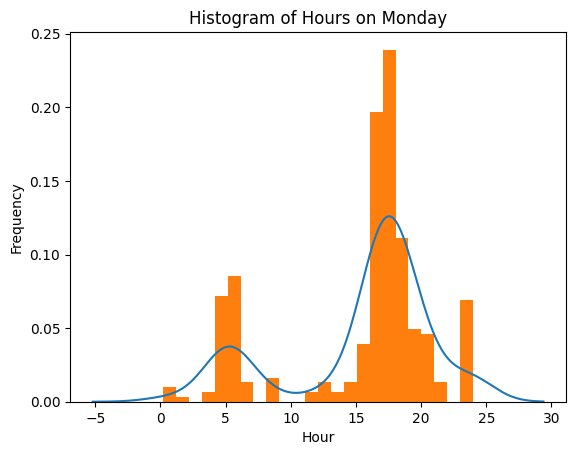

In [13]:

user_293_monday = user_293[user_293['DAY_OF_THE_WEEK'] == 'Monday']

# Create una columna que me de las horas dadas por utc time

user_293_monday['Hour'] = user_293_monday['UTC time'].dt.hour + user_293_monday['UTC time'].dt.minute / 60#para incluir los minutos
user_293_monday.head()

# El histograma
tau_monday= user_293_monday['Hour']
print(max(tau_monday), min(tau_monday))
# hISTOGRAM OF tau_monday
sns.kdeplot(tau_monday)
plt.hist(tau_monday, bins=24, density=True)#toma la frecuenecia en escala log, tenemos binds lineales
plt.xlabel('Hour')
plt.ylabel('Frequency') 
plt.title('Histogram of Hours on Monday')
plt.show()



### 2.2)El histograma de la semana 

In [14]:
# Concatenate the data from all days
user_293_all_days = pd.concat([user_293_monday, user_293[user_293['DAY_OF_THE_WEEK'] != 'Monday']])

# Create a column that represents the hours of the day
user_293_all_days['Hour'] = user_293_all_days['UTC time'].dt.dayofweek * 24 + user_293_all_days['UTC time'].dt.hour + user_293_all_days['UTC time'].dt.minute / 60
user_293_all_days.head()    

# Create a column that represents the hours of the day

user_293_all_days.head(1000)


,User ID,UTC time,Time Difference τ,DAY_OF_THE_WEEK,Hour
6187,293,2012-04-09 11:57:14+00:00,0 days 16:25:52,Monday,11.950000
6188,293,2012-04-09 11:57:30+00:00,0 days 00:00:16,Monday,11.950000
6282,293,2012-04-09 12:32:09+00:00,0 days 00:34:39,Monday,12.533333
6346,293,2012-04-09 12:56:28+00:00,0 days 00:24:19,Monday,12.933333
6709,293,2012-04-09 16:26:07+00:00,0 days 03:29:39,Monday,16.433333
...,...,...,...,...,...
119868,293,2012-07-03 17:57:41+00:00,0 days 00:01:27,Tuesday,41.950000
120345,293,2012-07-03 23:44:07+00:00,0 days 05:46:26,Tuesday,47.733333
120380,293,2012-07-04 00:07:35+00:00,0 days 00:23:28,Wednesday,48.116667
120387,293,2012-07-04 00:09:48+00:00,0 days 00:02:13,Wednesday,48.150000


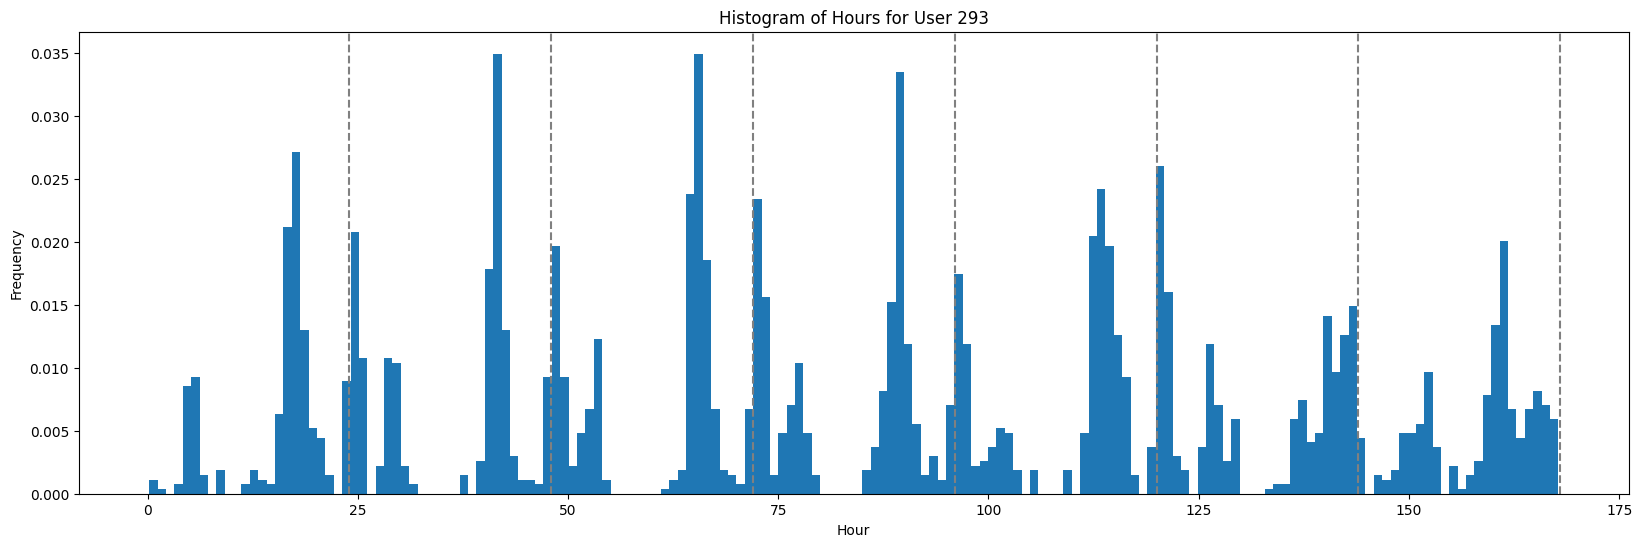

In [15]:
# Plot the histogram

plt.figure(figsize=(20, 6))# Adjust the width and height as needed
#sns.kdeplot(user_293_all_days['Hour'])
plt.hist(user_293_all_days['Hour'], bins=168, density=True)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Histogram of Hours for User 293')

# Plot vertical lines at specific hours

hours = [24, 48, 72, 96, 120, 144, 168]
for hour in hours:
    plt.axvline(hour, color='gray', linestyle='--')


plt.show()

#Faltaria ver que se puede representar esa densidad


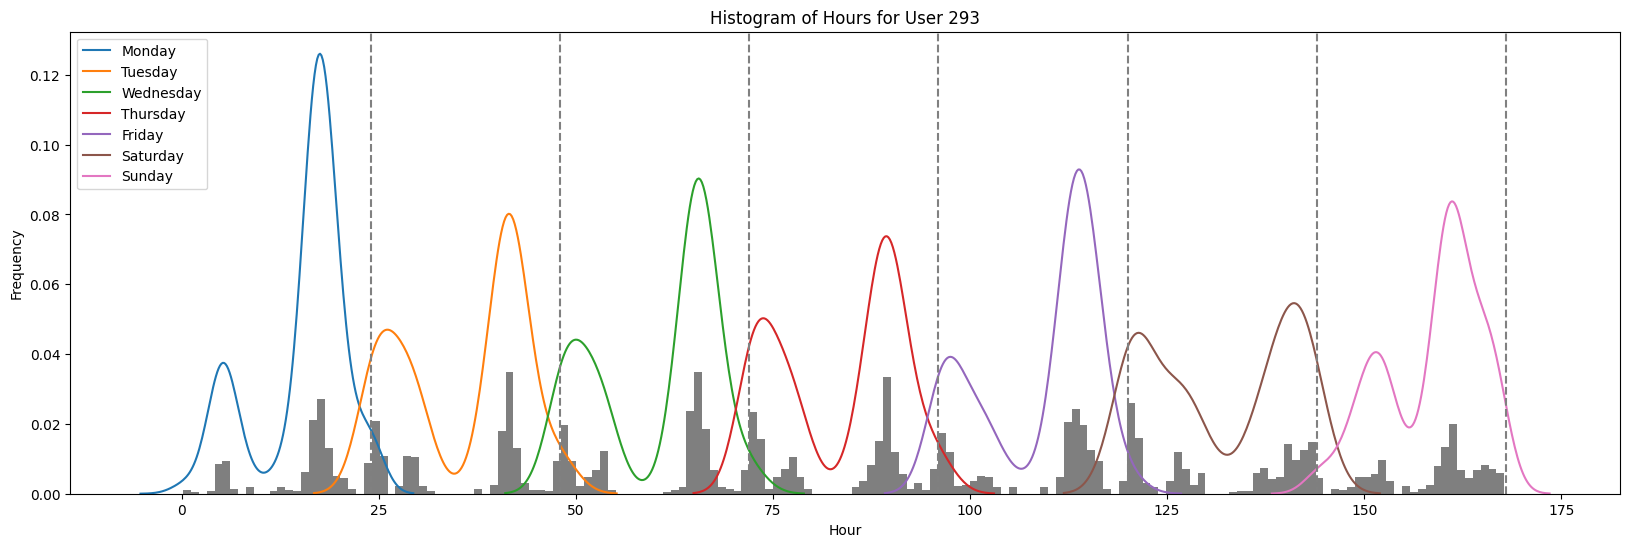

In [31]:
# Plot the histogram

plt.figure(figsize=(20, 6))

# Iterate over each day of the week
for day in user_293_all_days['DAY_OF_THE_WEEK'].unique():
    # Filter the data for the current day
    data = user_293_all_days[user_293_all_days['DAY_OF_THE_WEEK'] == day]['Hour']
    
    # Plot the KDE plot for the current day
    sns.kdeplot(data, label=day)

# Plot the histogram
plt.hist(user_293_all_days['Hour'], bins=168, density=True)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Histogram of Hours for User 293')

# Plot vertical lines at specific hours

hours = [24, 48, 72, 96, 120, 144, 168]
for hour in hours:
    plt.axvline(hour, color='gray', linestyle='--')

plt.legend()
plt.show()



## 3)Histograma semanal de cualquier usuario:

In [17]:
""" Va a sacar la grafica de todos los usuarios

usuarios=df[['User ID', 'UTC time']] 

# Iterate over each unique user ID
for user_id in usuarios['User ID'].unique():
    # Select the data for the current user
    user_data = usuarios[usuarios['User ID'] == user_id]
    user_data['UTC time'] = pd.to_datetime(user_data['UTC time'])
    user_data = user_data.sort_values('UTC time')
    user_data['DAY_OF_THE_WEEK'] = user_data['UTC time'].dt.day_name()
    user_data_monday = user_data[user_data['DAY_OF_THE_WEEK'] == 'Monday']

    # Create a column that represents the hours of the day
    user_data_monday['Hour'] = user_data_monday['UTC time'].dt.hour + user_data_monday['UTC time'].dt.minute / 60

    # Plot the histogram for Monday
    tau_monday = user_data_monday['Hour']
    print(f"User ID: {user_id}")
    print(f"Max Hour on Monday: {max(tau_monday)}")
    print(f"Min Hour on Monday: {min(tau_monday)}")
    sns.kdeplot(tau_monday)
    plt.hist(tau_monday, bins=24, density=True)
    plt.xlabel('Hour')
    plt.ylabel('Frequency') 
    plt.title(f'Histogram of Hours on Monday for User {user_id}')
    plt.show()

    # Concatenate the data from all days
    user_data_all_days = pd.concat([user_data_monday, user_data[user_data['DAY_OF_THE_WEEK'] != 'Monday']])

    # Create a column that represents the hours of the day
    user_data_all_days['Hour'] = user_data_all_days['UTC time'].dt.dayofweek * 24 + user_data_all_days['UTC time'].dt.hour + user_data_all_days['UTC time'].dt.minute / 60

    # Plot the histogram for all days
    plt.figure(figsize=(20, 6))
    plt.hist(user_data_all_days['Hour'], bins=168, density=True)
    plt.xlabel('Hour')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Hours for User {user_id}')

    # Plot vertical lines at specific hours
    hours = [24, 48, 72, 96, 120, 144, 168]
    for hour in hours:
        plt.axvline(hour, color='gray', linestyle='--')

    plt.show()
    """ 


'\n\nusuarios=df[[\'User ID\', \'UTC time\']] \n\n# Iterate over each unique user ID\nfor user_id in usuarios[\'User ID\'].unique():\n    # Select the data for the current user\n    user_data = usuarios[usuarios[\'User ID\'] == user_id]\n    user_data[\'UTC time\'] = pd.to_datetime(user_data[\'UTC time\'])\n    user_data = user_data.sort_values(\'UTC time\')\n    user_data[\'DAY_OF_THE_WEEK\'] = user_data[\'UTC time\'].dt.day_name()\n    user_data_monday = user_data[user_data[\'DAY_OF_THE_WEEK\'] == \'Monday\']\n\n    # Create a column that represents the hours of the day\n    user_data_monday[\'Hour\'] = user_data_monday[\'UTC time\'].dt.hour + user_data_monday[\'UTC time\'].dt.minute / 60\n\n    # Plot the histogram for Monday\n    tau_monday = user_data_monday[\'Hour\']\n    print(f"User ID: {user_id}")\n    print(f"Max Hour on Monday: {max(tau_monday)}")\n    print(f"Min Hour on Monday: {min(tau_monday)}")\n    sns.kdeplot(tau_monday)\n    plt.hist(tau_monday, bins=24, density=True

### 3.1)Creamos un diccionario de todos

In [ ]:
usuarios=df[['User ID', 'UTC time']] 


# Create an empty dictionary
hour_dict = {}#SE GUARDARAN LOS VALORES DE LAS HORAS DE CADA USUARIO PARA LOS DIAS DE LA SEMANA SOLAMENTE VERIFICANDO LOS DIAS DE LA SEMANA 

# Iterate over each unique user ID
for user_id in usuarios['User ID'].unique():
    # Select the data for the current user
    user_data = usuarios[usuarios['User ID'] == user_id]
    user_data['UTC time'] = pd.to_datetime(user_data['UTC time'])
    user_data = user_data.sort_values('UTC time')
    user_data['DAY_OF_THE_WEEK'] = user_data['UTC time'].dt.day_name()
    user_data_monday = user_data[user_data['DAY_OF_THE_WEEK'] == 'Monday']

    # Create a column that represents the hours of the day
    user_data_monday['Hour'] = user_data_monday['UTC time'].dt.hour + user_data_monday['UTC time'].dt.minute / 60

    # Concatenate the data from all days
    user_data_all_days = pd.concat([user_data_monday, user_data[user_data['DAY_OF_THE_WEEK'] != 'Monday']])

    # Create a column that represents the hours of the day
    user_data_all_days['Hour'] = user_data_all_days['UTC time'].dt.dayofweek * 24 + user_data_all_days['UTC time'].dt.hour + user_data_all_days['UTC time'].dt.minute / 60

    # Save the array as the value of the dictionary with the key being the user ID
    hour_dict[user_id] = user_data_all_days['Hour'].values

# Print the dictionary
#print(hour_dict)

### 3.2)Funcion para graficar cada usuario


In [19]:
def plot_user_hours(user_id):
    plt.figure(figsize=(20, 6))
    plt.hist(hour_dict[user_id], bins=168, density=True)
    plt.xlabel('Hour')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Hours for User {user_id}')

    hours = [24, 48, 72, 96, 120, 144, 168]
    for hour in hours:
        plt.axvline(hour, color='gray', linestyle='--')

    plt.show()

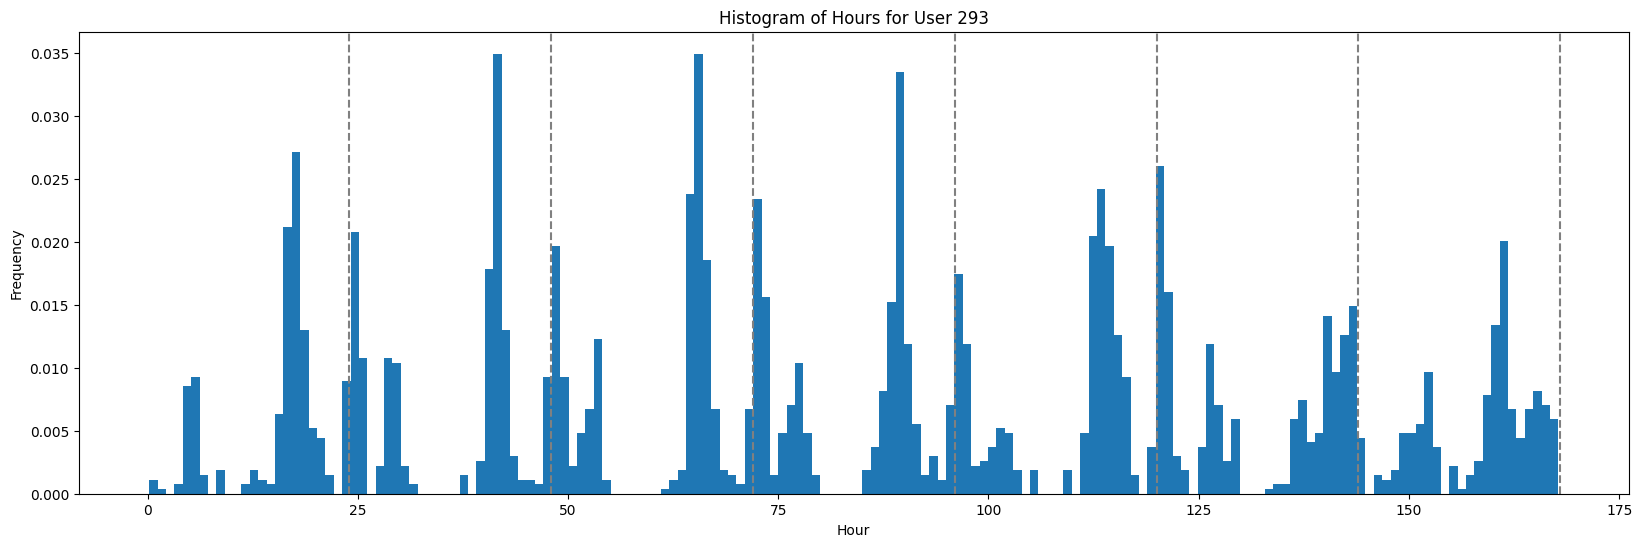

In [20]:
plot_user_hours('293')

## 4)Clustering de los histogramas de las personas 

In [ ]:
from sklearn.cluster import KMeans

# Convert the dictionary of user arrays to a list of arrays
user_arrays = list(hour_dict.values())

# Convert the list of arrays to a 2D numpy array
X = np.vstack(user_arrays)

# Define the number of clusters
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the dictionary of user arrays
for i, user_id in enumerate(hour_dict.keys()):
    hour_dict[user_id] = (user_arrays[i], cluster_labels[i])


In [ ]:
# from chat gpt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming users_dict is your dictionary containing arrays of hours for each user

# Step 1: Preprocessing
# Assuming arrays are already of the same length
# Normalize data
scaler = StandardScaler()
normalized_data = {user: scaler.fit_transform(data) for user, data in users_dict.items()}

# Step 2: Feature Extraction
# Here, let's consider just mean and standard deviation as features
feature_vectors = {user: [np.mean(data), np.std(data)] for user, data in normalized_data.items()}

# Step 3: Choose a Clustering Method
# Let's use KMeans for clustering
kmeans = KMeans(n_clusters=3)

# Step 4: Apply the Chosen Method
# Fit KMeans on the feature vectors
kmeans.fit(list(feature_vectors.values()))

# Step 5: Evaluation (Optional)

# Step 6: Interpretation
# Assign clusters to users
cluster_labels = kmeans.labels_
clusters = {}
for user, cluster_label in zip(feature_vectors.keys(), cluster_labels):
    if cluster_label not in clusters:
        clusters[cluster_label] = []
    clusters[cluster_label].append(user)

print(clusters)


#Selecting a Model: Decide on the appropriate machine learning model for your task. For time-series data like app usage
# over hours of the week, recurrent neural networks (RNNs) or convolutional neural networks (CNNs) could be suitable choices.
# Alternatively, you could explore other models such as decision trees, random forests, or gradient boosting machines.

Divergencia de Jensen shanon, distancia entre histograma, distancia de kul ba claude

## Now for all of the users: (POR CORREGIR)

In [1]:
df_all = df[['User ID', 'Timezone offset in minutes', 'UTC time']]
#pilas no lo esta tomando como tiempo 
df_all['UTC time'] = pd.to_datetime(df_all['UTC time'])
#ORGANIZANDO POR USUARIO Y POR TIEMPO
df_all = df_all.sort_values('UTC time')
df_all = df_all.sort_values(['User ID', 'UTC time'])# con esto se organiza de tal forma que se tiene en cuanta  la 
#fecha asendente de FINALIZACION, EL FINAL DE UN USUARIO siempre es antes que el final del siguiente 
#No se si esta bien, pero es una forma de organizarlo!

#df_all['Time Difference τ'] = df_all.groupby('User ID')['UTC time'].diff()

df_all.head(110)

#df_all.to_csv('filename.csv', index=False)



NameError: name 'df' is not defined

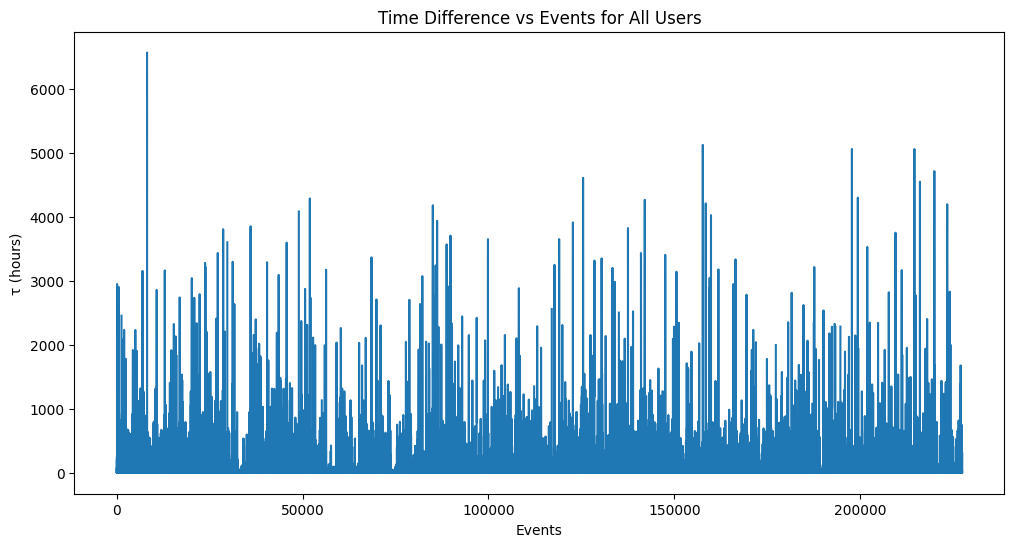

In [22]:

# Calculate the time difference
df_all['Time Difference τ'] = df_all.groupby('User ID')['UTC time'].diff()

# Create a counter column for all users
df_all['Counter'] = range(len(df_all))

# Convert time difference to hours
df_all['Time Difference (hours)'] = df_all['Time Difference τ'].dt.total_seconds() / 3600


# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the graph
plt.plot(df_all['Counter'], df_all['Time Difference (hours)'])
plt.xlabel('Events')
plt.ylabel('τ (hours)')
plt.title('Time Difference vs Events for All Users')
plt.show()


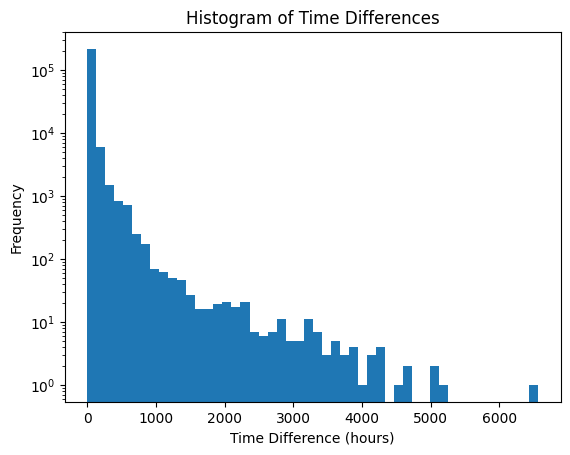

In [23]:
time_diff = df_all['Time Difference (hours)']

# Convert the time differences to an array
time_diff_array = np.array(time_diff)
plt.hist(time_diff_array, bins=50, log=True)
plt.xlabel('Time Difference (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Differences')
plt.show()


In [24]:
fit = powerlaw.Fit(time_diff_array)# fits a power-law distribution to a data set. 
alpha = fit.alpha  # Scaling exponent (alpha)
xmin = fit.xmin  
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf(color='b', linewidth=2)
fit.plot_pdf(color='r', linestyle='None', marker='o', markersize=5, label='data points')
plt.legend()
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


KeyboardInterrupt: 

In [ ]:
print (alpha, xmin)

2.3734792061280436 85.47
